<a href="https://colab.research.google.com/github/varunjoshua/ScalerDSML_PortfolioProject-ProductSalesPrediction/blob/main/Scaler_DSML_Product_Sales_Forecasting_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product Sales Forecasting for Retail**

**Objective:**

* Build a predictive model to estimate future sales, based on historical sales data from different stores and various factors such store type, location, regional characteristics, promotional activities, and temporal variations such as holidays and seasons.

* Use the given data to derive insights that will guide strategic planning , inventory management and marketing & promotions.  



#**Importing Data & Libraries**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
!gdown 1sLIwsVlV4Jwpl7D0gJOlILF8iUJaD1xl

Downloading...
From: https://drive.google.com/uc?id=1sLIwsVlV4Jwpl7D0gJOlILF8iUJaD1xl
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 25.4MB/s]


In [86]:
!gdown 1i1n0NUwk7LccNj33ndqLbrHgzqJy5XDf

Downloading...
From: https://drive.google.com/uc?id=1i1n0NUwk7LccNj33ndqLbrHgzqJy5XDf
To: /content/TEST_FINAL.csv
100% 849k/849k [00:00<00:00, 108MB/s]


In [87]:
df = pd.read_csv('TRAIN.csv')

In [88]:
df_test = pd.read_csv('TEST_FINAL.csv')

In [89]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## **Data description**
* ID: Unique identifier for each record in the dataset.
* Store_id: Unique identifier for each store.
* Store_Type: Categorization of the store based on its type.
* Location_Type: Classification of the store's location (e.g., urban, suburban).
* Region_Code: Code representing the geographical region where the store is located.
* Date: The specific date on which the data was recorded.
* Holiday: Indicator of whether the date was a holiday (1: Yes, 0: No).
* Discount: Indicates whether a discount was offered on the given date (Yes/No).
* #Order: The number of orders received by the store on the specified day.
Sales: Total sales amount for the store on the given day.


# **Exploratory Data Analysis**

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [91]:
df.isna().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [92]:
print(f"Number of duplicate entries: {df.duplicated().sum()}")

Number of duplicate entries: 0


In [93]:
df['Date'] = pd.to_datetime(df['Date'])

In [94]:
df.rename(columns = {'#Order':'Orders'}, inplace = True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   Orders         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [96]:
df.describe(include = "all")

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,NaN,NaN,2,NaN,NaN
top,T1188340,NaN,S1,L1,R1,NaN,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,NaN,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,2018-09-15 12:00:00.000000256,0.131783,NaN,68.205692,42784.327982
min,NaN,1.000000,NaN,NaN,NaN,2018-01-01 00:00:00,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,2018-05-09 18:00:00,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,2018-09-15 12:00:00,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,2019-01-22 06:00:00,0.000000,NaN,82.000000,51909.000000
max,NaN,365.000000,NaN,NaN,NaN,2019-05-31 00:00:00,1.000000,NaN,371.000000,247215.000000


In [97]:
df[df['Sales'] < 1000]

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales
23867,T1023868,311,S4,L2,R2,2018-03-07,0,No,0,0.00
38143,T1038144,222,S4,L2,R2,2018-04-15,1,No,0,0.00
90458,T1090459,233,S1,L3,R3,2018-09-05,0,No,0,0.00
97301,T1097302,271,S1,L3,R2,2018-09-24,0,No,0,0.00
97480,T1097481,271,S1,L3,R2,2018-09-25,0,No,0,0.00
99489,T1099490,12,S1,L3,R2,2018-09-30,0,No,0,0.00
99904,T1099905,12,S1,L3,R2,2018-10-01,0,No,0,0.00
100215,T1100216,12,S1,L3,R2,2018-10-02,1,No,0,0.00
112564,T1112565,39,S4,L1,R1,2018-11-05,0,No,0,0.00
112853,T1112854,39,S4,L1,R1,2018-11-06,1,No,0,0.00


In [98]:
print('No of stores with 0 sales:', df[df['Sales'] < 1].shape[0])

No of stores with 0 sales: 19


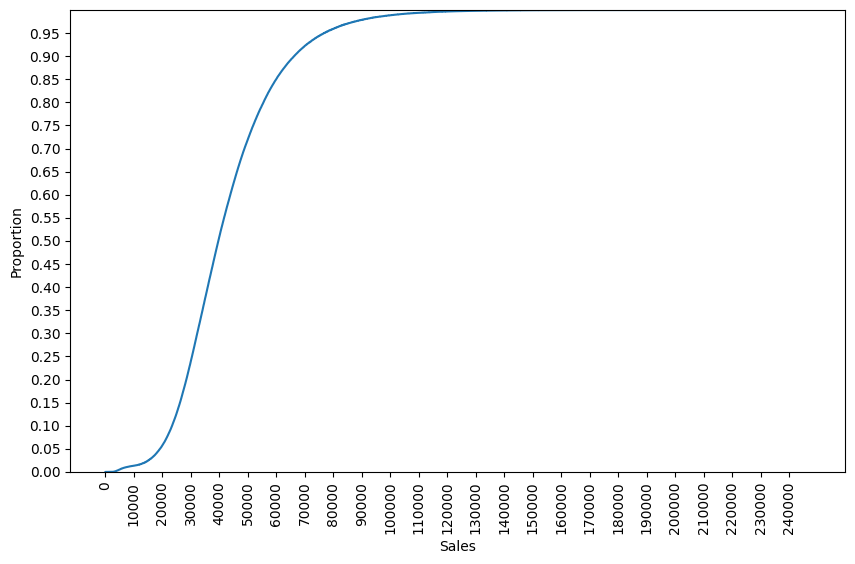

In [99]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='Sales')
xmax = df['Sales'].max()
plt.xticks(np.arange(0,xmax,10000), rotation = 90)
plt.yticks(np.arange(0,1,0.05))
plt.show()

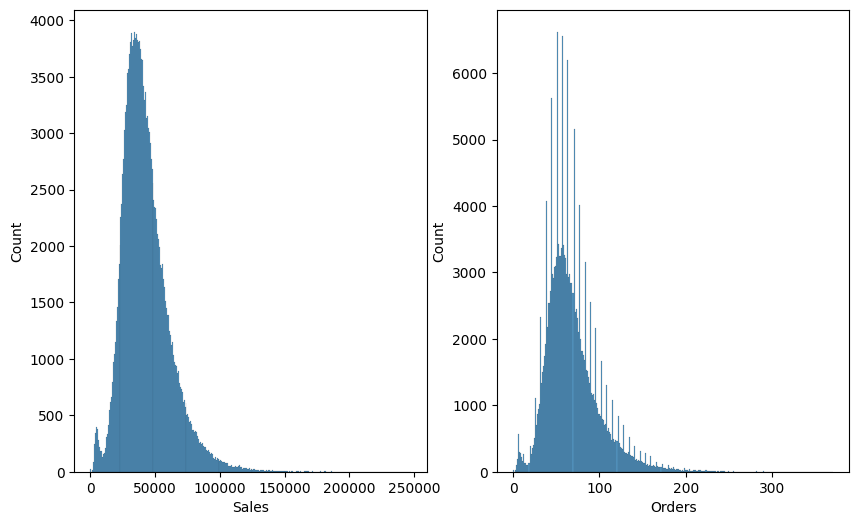

In [100]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(df['Sales'])
plt.subplot(1,2,2)
sns.histplot(df['Orders'])
plt.show()

In [101]:
df['Region_Code'].value_counts()

,count
Region_Code,
R1,63984
R2,54180
R3,44376
R4,25800


In [102]:
df['Location_Type'].value_counts()

,count
Location_Type,
L1,85140
L2,48504
L3,29928
L5,13932
L4,10836


In [103]:
df['Store_Type'].value_counts()

,count
Store_Type,
S1,88752
S4,45924
S2,28896
S3,24768


In [104]:
df['Store_id'].nunique()

365

In [105]:
discount_days = df[['Date','Discount']].copy(deep = True)
discount_days['Yes'] = discount_days['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)
discount_days['No'] = discount_days['Discount'].apply(lambda x: 1 if x == 'No' else 0)
discount_days = discount_days.groupby('Date').agg({'Yes':'sum', 'No':'sum'})
discount_days.sample(5)

,Yes,No
Date,,
2018-03-09,1,364
2018-08-26,3,362
2018-03-03,361,4
2018-03-18,361,4
2018-08-06,325,40


## Observation & Handling
* The dataset contains 188340 records with no null values and duplicates
* The Date column was in object type and was converted to DateTime for better processing
* The data is for the period from 2018-01-01 to 2019-05-31 i.e. 516 days
* The data is collected from 365 stores from 4 different regions (R1, R2, R3, R4) categorized into 4 types (S1, S2, S3, S4) and 5 different location types (L1, L2, L3, L4 L5).
* Not all stores have discounts on the same days.
* There are 19 records on the dataset with 0 orders and sales. The are potential anomalies that need to be analzed and removed if necessary.  

In [106]:
df.sort_values(by = ['Store_id', 'Date']).tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales
186722,T1186723,365,S2,L1,R2,2019-05-27,0,Yes,55,39993.00
186986,T1186987,365,S2,L1,R2,2019-05-28,0,Yes,70,54132.00
187479,T1187480,365,S2,L1,R2,2019-05-29,0,No,31,22692.00
187617,T1187618,365,S2,L1,R2,2019-05-30,0,No,45,31671.00
187983,T1187984,365,S2,L1,R2,2019-05-31,1,No,44,30720.87


In [107]:
df_copy = df.copy(deep = True)

# **Preparing Datasets for Time Series Analysis**

Using the given data we can forecast sales at the company, regional, location type, store type and store level. Creating and handling multiple datasets and forecasting sales for all cases would be cumbersome.

Since the brief does not mention whether the forecasting is required to be done at the company, regional, location type, or store level, we are assuming that the company and decision makers will be most informed by analysis and sales forecast at the overall company and regional levels.

Using functions for training, and evaluation we will bult a reusable pipeline that can later be adapted and applied to location type, store type or individual store level data if needed, saving significant effort.

**Dataset to be created:**

* Company Level Dataset: ts_co
* Regional Datasets: ts_r1, ts_r2, ts_r3, ts_r4

  

**Handling Discount while Grouping & Aggregating:**
* Discounts are not applied uninformly across stores i.e. on a certain day not all 365 stores have or don't have discounts.
* Discount is applicable to a single store on a single day, so when grouping and aggregating the dataset for Company level or Regional level time series we will represent Discount as proportion of stores on Discount on that day for Company level data and proportion of stores on Discount on that day in that region for Region Level Data.
* The approach was chosen since Proportion of Sales, which a better indicator of discount impact, would not be available for test and real world data.






### **Company Level Data**

In [108]:
df['Discounted_Flag'] = df['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales,Discounted_Flag
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1


In [109]:
ts_co = df.groupby('Date').agg({'Holiday':'last', 'Discounted_Flag': lambda x: x.sum() / x.count(),'Orders':'sum', 'Sales':'sum'}).reset_index()
ts_co.set_index('Date', inplace = True)
ts_co.head()

,Holiday,Discounted_Flag,Orders,Sales
Date,,,,
2018-01-01,1,1.00000,19666,15345484.5
2018-01-02,0,1.00000,25326,19592415.0
2018-01-03,0,1.00000,24047,18652527.0
2018-01-04,0,0.99726,25584,19956267.0
2018-01-05,0,0.99726,28436,22902651.0


In [110]:
ts_co.rename(columns = {"Discounted_Flag":"Discounted Stores"}, inplace = True)


In [111]:
ts_co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2018-01-01 to 2019-05-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday            516 non-null    int64  
 1   Discounted Stores  516 non-null    float64
 2   Orders             516 non-null    int64  
 3   Sales              516 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 20.2 KB


In [112]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales,Discounted_Flag
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1


### **Regional Datasets**

In [113]:
ts_r1 = df[df['Region_Code'] == 'R1']
ts_r2 = df[df['Region_Code'] == 'R2']
ts_r3 = df[df['Region_Code'] == 'R3']
ts_r4 = df[df['Region_Code'] == 'R4']

In [114]:
ts_r1 = ts_r1.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r2 = ts_r2.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r3 = ts_r3.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r4 = ts_r4.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})

In [115]:
ts_r1.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r2.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r3.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r4.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)

In [116]:
ts_r1.sample(5)

,Holiday,Discount,Discounted Stores,Orders,Sales
Date,,,,,
2019-03-01,1,Yes,0.919355,9833,5595120.24
2018-12-21,0,Yes,0.322581,9929,6755676.00
2018-11-04,0,No,0.096774,10070,5633676.00
2018-02-02,0,No,0.008065,8119,4410351.00
2018-11-22,0,No,0.516129,8691,4810398.00


## **Outlier/Anamoly Detection**

In [117]:
import statsmodels.api as sm

In [118]:
datasets = {'Company': ts_co, 'Region 1': ts_r1, 'Region 2': ts_r2, 'Region 3': ts_r3, 'Region 4':ts_r4}

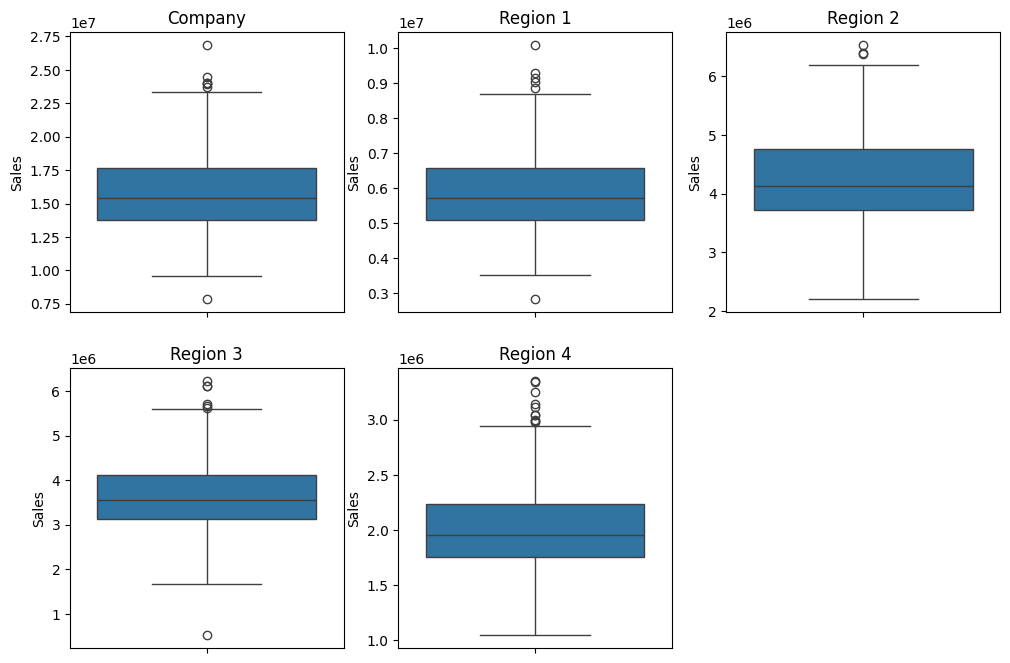

In [212]:
plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.boxplot(data['Sales'])
  plt.title(f'{name}')

plt.show()

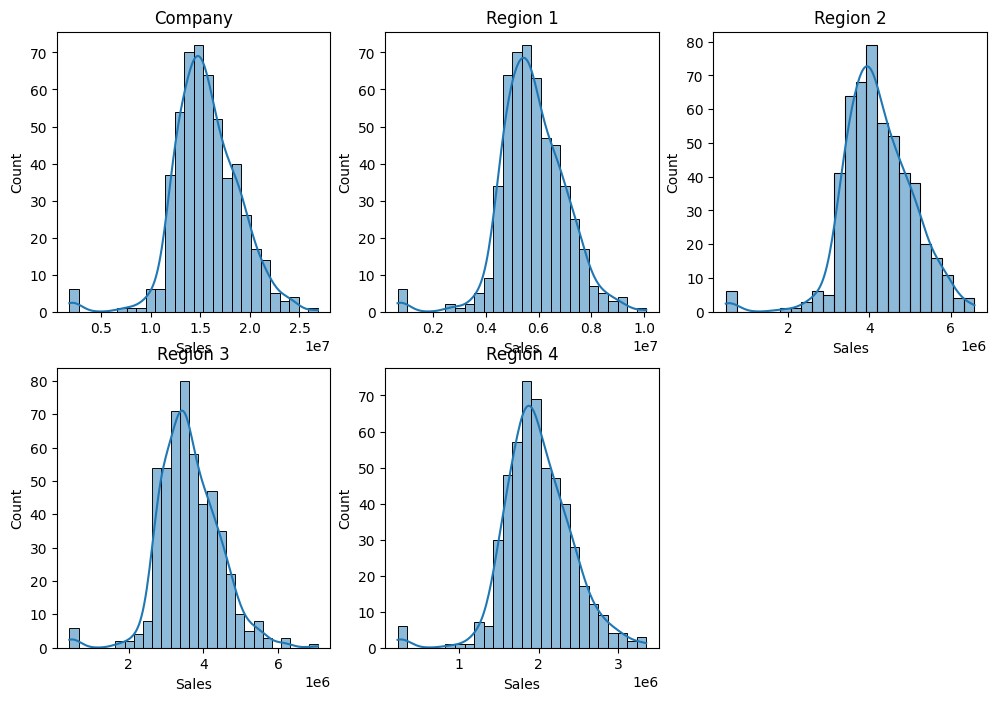

In [120]:
# Checking distribution of datasets

plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.histplot(data['Sales'], kde = True)
  plt.title(f'{name}')

plt.show()

In [121]:
# Checking Minimum Sales

for name, data in datasets.items():
  print(f'Min Sales in {name}:{data["Sales"].min()}.')

Min Sales in Company:1762137.57.
Min Sales in Region 1:654808.47.
Min Sales in Region 2:474569.37.
Min Sales in Region 3:409091.13.
Min Sales in Region 4:222144.24.


In [122]:
for name, data in datasets.items():
  print(f'No of days in {name} with Sales < 1000000:{data[data["Sales"] < 1000000].shape[0]}.')

No of days in Company with Sales < 1000000:0.
No of days in Region 1 with Sales < 1000000:6.
No of days in Region 2 with Sales < 1000000:6.
No of days in Region 3 with Sales < 1000000:6.
No of days in Region 4 with Sales < 1000000:7.


Residual mean of Company:5749.545895886796

Residual mean of Region 1:1970.4179788700174

Residual mean of Region 2:1185.6895776258227

Residual mean of Region 3:1952.932193528335

Residual mean of Region 4:640.5061458625806



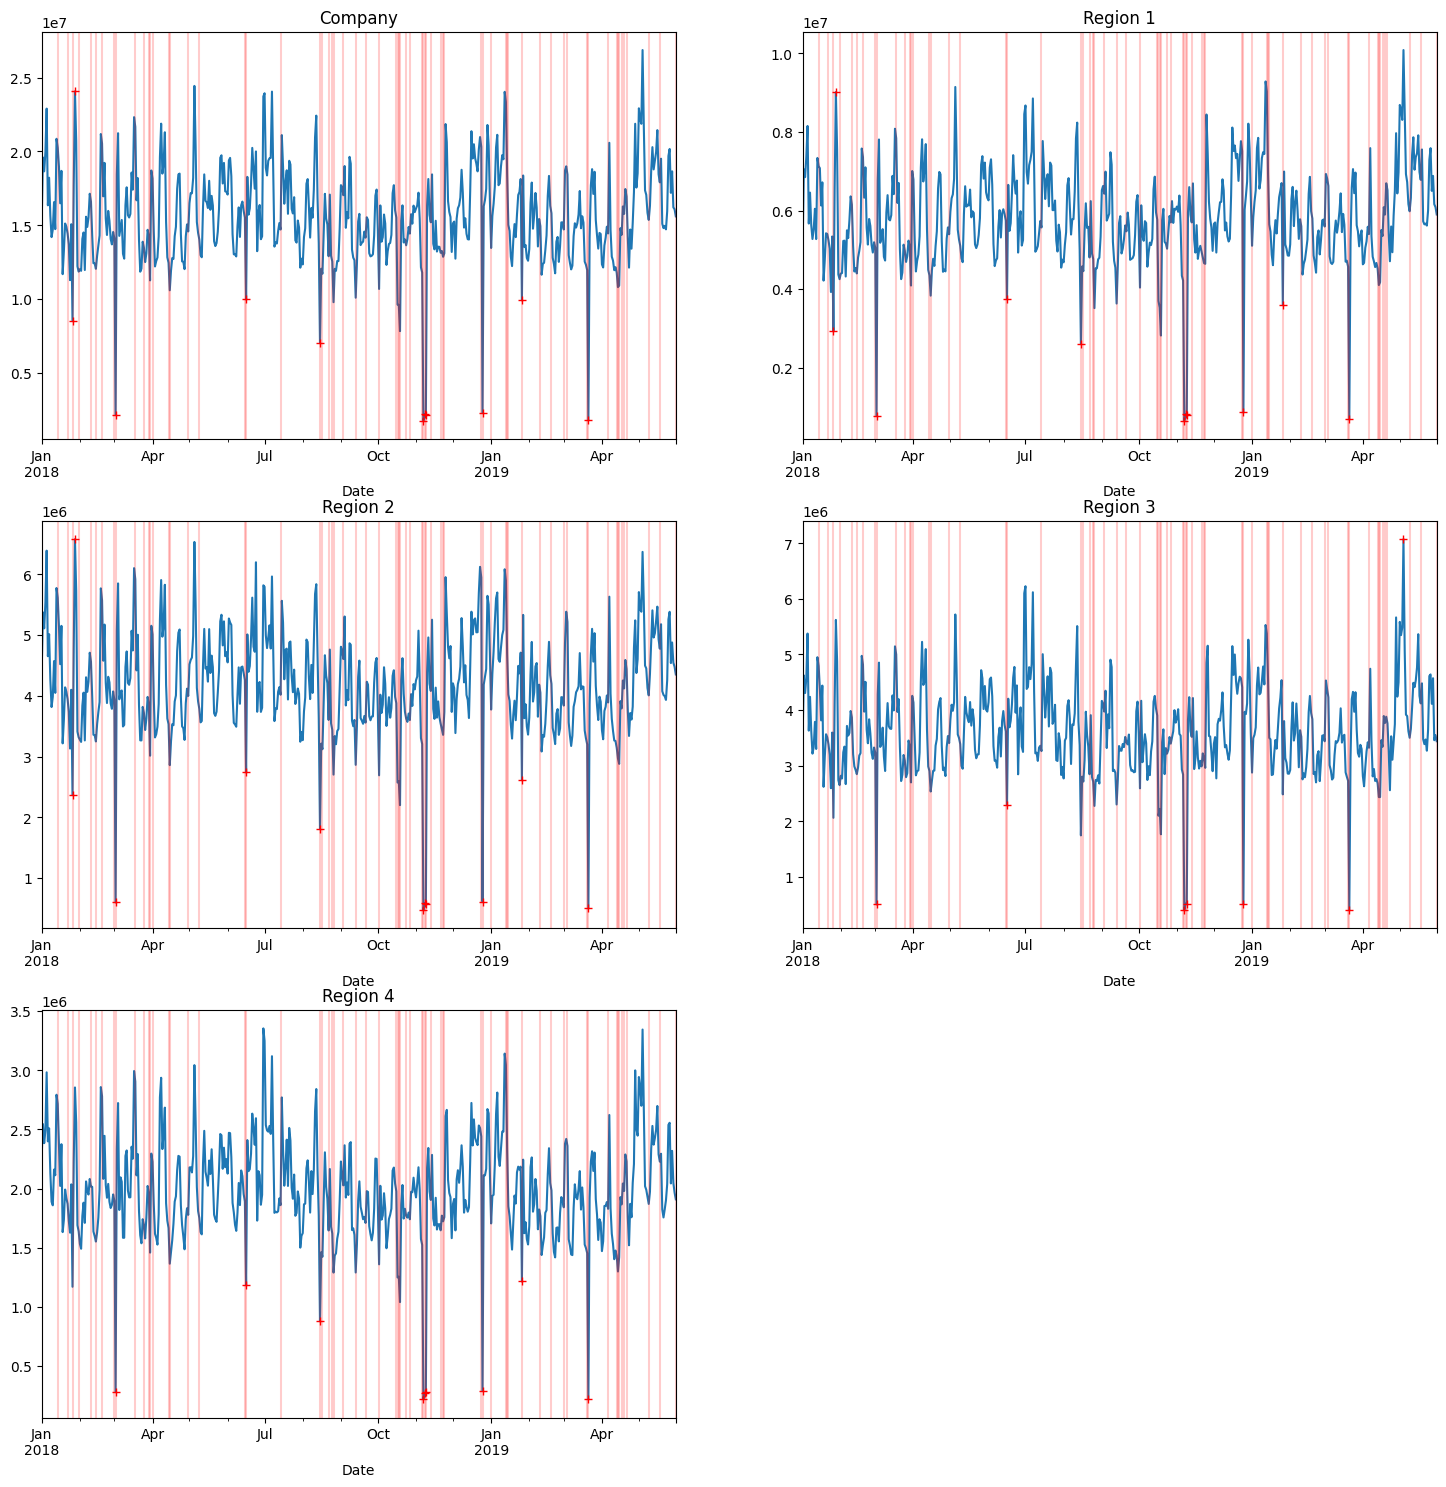

In [123]:
# Checking residuals for Anamolies against Holidays
# Where anamolies are residual values > 3x std deviation

import statsmodels.api as sm

plt.figure(figsize=(18, 18))
for i, (name, data) in enumerate(datasets.items()):
  model = sm.tsa.seasonal_decompose(data['Sales'], model='additive', period = 7)
  anomalies = data['Sales'][model.resid.abs() > 3 * model.resid.std()]
  data['Anomaly'] = model.resid.apply(lambda x: 1 if abs(x) > 3 * model.resid.std() else 0)

  print(f'Residual mean of {name}:{model.resid.mean()}')
  print()
  plt.subplot(3,2,i+1)
  data['Sales'].plot()
  anomalies.plot(style='+', color='red')
  holiday_dates = data[data['Holiday'] == 1].index
  for dates in holiday_dates:
    plt.axvline(x=dates, color='red', alpha=0.2, label='Holiday')
  plt.title(name)
plt.show()

In [124]:
# Hypothesis Test - Chi Square: Is there a significant Association between Holidays and Anomalies in Sales.
# H0: There is no significant association. H1: There is significant association

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(ts_co['Holiday'], ts_co['Anomaly'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("There is a significant association between 'Holiday' and 'Anomaly'.")
else:
    print("There is no significant association between 'Holiday' and 'Anomaly'.")

Chi-squared statistic: 52.615256998388915
p-value: 4.0572508834972095e-13
There is a significant association between 'Holiday' and 'Anomaly'.


In [169]:
ts_co.Anomaly.value_counts()

,count
Anomaly,
0,505
1,11


### **Anomaly/Outlier Handling**

* The boxplots show presence of outliers in the data. However, this could be attributed to seasonality and exogenous factors i.e. possible real world scenarios which the model might be able to use to make more accurate forecasts, hence futher check are required before they are treated/ imputed.  
* 'Sales' Distributions for all 5 data sets are bell shaped with few extreme values (6 or 7) on the lower side skewing the distribution left.
* To elimate the outliers occuring due to seasonality we can check if they're also present in the residue. Residual values > 3x std deviation are considered as anomalies.
* The time series plots shows that anomalies, which are mostly in lower values seen as sharp dips, coinciding with holidays. There are 11 points identified as anamolies.
* The Chi-square tests shows a strong relation between holidays and anomalies suggesting that the low sales figures might be a result of certain factors related to holidays. This however is not observed on all holiday.
* The Anomalies will be interpolated to reduce their impact.

In [125]:
for i, (name, data) in enumerate(datasets.items()):
  data['Sales'] = data.apply(lambda row: row['Sales'] if row['Anomaly'] == 0 else None, axis = 1)
  data['Sales'] = data['Sales'].interpolate(method = 'linear', axis = 0)

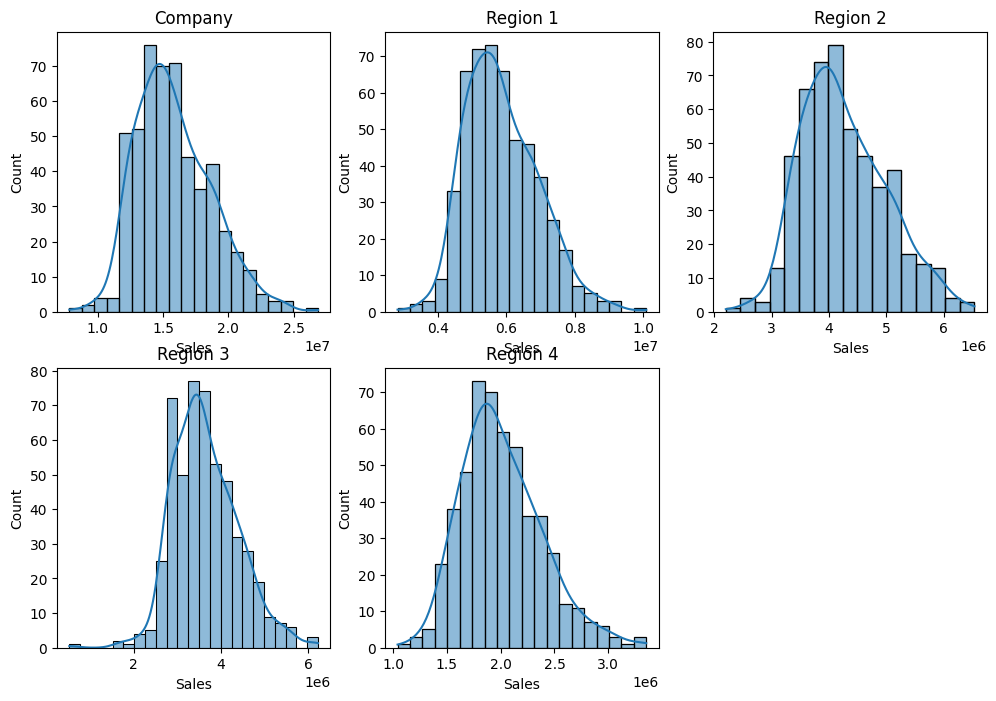

In [172]:
# Checking distribution of datasets

plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.histplot(data['Sales'], kde = True)
  plt.title(f'{name}')

plt.show()

# **Hypothesis Testing**

In [126]:
all = { 'All': df,'Company': ts_co, 'Region 1': ts_r1, 'Region 2': ts_r2, 'Region 3': ts_r3, 'Region 4':ts_r4}

### **1. Impact of Discount:** Do discounts significantly impact Sales?
.

**H0**: Sales are equal for discounted days and non-discounted days.

**H1**: Sales on discounted days are greater than non discounted days

.

**Test**: 2 sample independent t-Test

In [127]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales,Discounted_Flag
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1


In [128]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind( df[df["Discount"] == "Yes"]['Sales'] , df[df["Discount"] == "No"]['Sales'], alternative = "greater")

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. Sales on discounted days are higher")
else:
  print("Fail to reject the null hypothesis. Sales are equal on discounted and non-discounted days")


P-value: 0.0
Reject the null hypothesis. Sales on discounted days are higher


### **2. Effect of Holidays on Sales:** Are Sales lesser on holidays?
.

**H0**: Sales on holidays and non-holidays are the same.

**H1**: Sales on holidays are **lower** compared to non-holidays.

.

**Test**: 2 sample independent t-Test

In [129]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind( df[df["Holiday"] == 1]['Sales'] , df[df["Holiday"] == 0]['Sales'], alternative = "less")

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. Sales on holidays are LOWER compared to non-holidays")
else:
  print("Fail to reject the null hypothesis. Sales on holidays and non-holidays are the same.")

P-value: 0.0
Reject the null hypothesis. Sales on holidays are LOWER compared to non-holidays


### **3. Sales Differences Across Store Types:** Is there a difference in Sales across Store Types
.

**H0**: Sales are equal for all store types.

**H1**: There's a significant difference in Sales across Store Types.

.

**Test**: ANOVA OR Kruskal Wallis Test

In [130]:
s1 = df[df['Store_Type'] == "S1"]['Sales']
s2 = df[df['Store_Type'] == "S2"]['Sales']
s3 = df[df['Store_Type'] == "S3"]['Sales']
s4 = df[df['Store_Type'] == "S4"]['Sales']
store_types = [ s1, s2, s3, s4]

In [131]:
# Checking data for normal distribution and equal variance using Shapiro Wilk Test & Levene Test
from scipy.stats import shapiro
from scipy.stats import levene

# Shapiro - Wilk Test
for st in store_types:

  test_stat, p_shapiro = shapiro(st)
  print("Shapiro Wilk P-value:", p_shapiro)

  if p_shapiro < 0.05:
    print("Data is not normally distributed\n ")
  else:
    print("Data is normally distributed\n ")


# Levene Test for Equal Variance
test_stat, p_levene = levene(s1, s2, s3, s4)

print("Levene P-value:", p_levene)

if p_levene < 0.05:
    print("Store_Type Sales variances are not equal.")
else:
    print("Store_Type Sales variances are equal.")


Shapiro Wilk P-value: 6.244850959544344e-79
Data is not normally distributed
 
Shapiro Wilk P-value: 2.313188234690706e-51
Data is not normally distributed
 
Shapiro Wilk P-value: 2.4892304934955129e-57
Data is not normally distributed
 
Shapiro Wilk P-value: 7.54256999559744e-79
Data is not normally distributed
 
Levene P-value: 0.0
Store_Type Sales variances are not equal.


###**Note:**
* The data is not normally distributes and the groups do not show equal variance.
* We can check if there's a difference in sales across Store_Types using the Kruskal Wallis Test, which is non-parametric and does not require normal distribution of data of equal variance

In [132]:
from scipy.stats import kruskal

f_stat, p_value = kruskal(s1, s2, s3, s4)

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. There's a significant difference in Sales across Store Types")
else:
  print("Fail to reject the null hypothesis. Sales are equal across Store Types")



P-value: 0.0
Reject the null hypothesis. There's a significant difference in Sales across Store Types


### **4. Sales Differences Across Regions:** Is there a difference in Sales across Region Codes
.

**H0**: Sales are equal for all Regions.

**H1**: There's a significant difference in Sales across Regions.

.

**Test**: ANOVA OR Kruskal Wallis Test

In [133]:
r1 = df[df['Region_Code']== "R1"]['Sales']
r2 = df[df['Region_Code']== "R2"]['Sales']
r3 = df[df['Region_Code']== "R3"]['Sales']
r4 = df[df['Region_Code']== "R4"]['Sales']
regions = [r1, r2, r3, r4]

In [134]:
# Checking regional data for normal distribution and equal variance using Shapiro Wilk Test & Levene Test


# Shapiro Wilk Test

for r in regions:

  test_stat, p_shapiro = shapiro(r)
  print("Shapiro Wilk P-value:", p_shapiro)
  if p_shapiro < 0.05:
    print("Data is not normally distributed\n ")
  else:
    print("Data is normally distributed\n ")

# Levene Test for Equal Variance

test_stat, p_levene = levene(r1, r2, r3, r4)

print("Levene P-value:", p_levene)

if p_levene < 0.05:
    print("Region Sales variances are not equal.")
else:
    print("Region Sales variances are equal.")




Shapiro Wilk P-value: 5.568579127456188e-90
Data is not normally distributed
 
Shapiro Wilk P-value: 6.326690054699451e-85
Data is not normally distributed
 
Shapiro Wilk P-value: 1.174723480209048e-78
Data is not normally distributed
 
Shapiro Wilk P-value: 2.5918854183877692e-68
Data is not normally distributed
 
Levene P-value: 0.0
Region Sales variances are not equal.


###**Note:**
* The regiona sales data is not normally distributes and the groups do not show equal variance.
* We can check if there's a difference in sales across Regions using the Kruskal Wallis Test, which is non-parametric and does not require normal distribution of data of equal variance

In [135]:
from scipy.stats import kruskal

f_stat, p_value = kruskal(r1, r2, r3, r4)

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. There's a significant difference in Sales across Regions")
else:
  print("Fail to reject the null hypothesis. Sales are equal across Regions")

P-value: 0.0
Reject the null hypothesis. There's a significant difference in Sales across Regions


### **5. Correlation between # of Orders and Sales**

**Test**: Pearson Correlation, Spearman Correlation

In [136]:
from scipy.stats import pearsonr, spearmanr

print('Pearson Correlation between #Orders & Sales:', pearsonr(df['Orders'] , df['Sales'])[0])

print('Spearman Correlation between #Orders & Sales:', spearmanr(df['Orders'] , df['Sales'])[0])

Pearson Correlation between #Orders & Sales: 0.9416005646125761
Spearman Correlation between #Orders & Sales: 0.9377462542885381


## Results of Hypothesis Tests:

* Sales on discounted days are higher than sales on days without discounts
* Sales on holidays are LOWER compared to non-holidays
* There's a significant difference in Sales across Store Types
* There's a significant difference in Sales across Regions
* There's a very high positive correlation (~0.94) between No. of Orders and Sales.

# **Regression Models**

## **Data Preprocessing**

In [137]:
lr_co = ts_co.copy(deep = True)
lr_r1 = ts_r1.copy(deep = True)
lr_r2 = ts_r2.copy(deep = True)
lr_r3 = ts_r3.copy(deep = True)
lr_r4 = ts_r4.copy(deep = True)

In [138]:
lr_co.drop(columns = "Anomaly", inplace = True)

In [139]:
lr_r1.drop(columns = "Anomaly", inplace = True)
lr_r2.drop(columns = "Anomaly", inplace = True)
lr_r3.drop(columns = "Anomaly", inplace = True)
lr_r4.drop(columns = "Anomaly", inplace = True)

In [140]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [141]:
# Creating Features from Date

for name, data in lr_data.items():
  #data['Day'] = data.index.day
  data['Month'] = data.index.month
  #data['Year'] = data.index.year
  data['Day of Week'] = data.index.day_name()
  #data['Quarter'] = data.index.quarter
  data['Day Count'] = (data.index - data.index[0]).days
  data['Weekend'] = data['Day of Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
  data['Day of Week'] = data.index.dayofweek

  if 'Discount' in data.columns:
       data.drop(columns=['Discount'], inplace=True)


In [142]:
# Encoding Month & Day of the Week to maintain cyclic nature of features

for name, data in lr_data.items():
    data['Month_sine'] = np.sin(2 * np.pi * data['Month'] / 12)
    data['Month_cosine'] = np.cos(2 * np.pi * data['Month'] / 12)
    data['Day of Week_sine'] = np.sin(2 * np.pi * data['Day of Week'] / 7)
    data['Day of Week_cosine'] = np.cos(2 * np.pi * data['Day of Week'] / 7)

    data.drop(columns = ['Month', 'Day of Week', 'Orders'], inplace = True)


    lr_data[name] = data



In [143]:
# Creating Sales Lag Features


for name, data in lr_data.items():
  #Lag 1
  data['Sales_Lag1'] = data['Sales'].shift(1)
  #Lag 2
  data['Sales_Lag2'] = data['Sales'].shift(2)
  #Lag 3
  data['Sales_Lag3'] = data['Sales'].shift(3)

  #Sales on the same weekday last week
  data['Sales_Lag7'] = data['Sales'].shift(7)

  #Sales on the same day last month
  data['Sales_Lag31'] = data['Sales'].shift(31)

  #Last week's average Sales
  data['Avg_Sales_Last7'] = data['Sales'].shift(1).rolling(window = 7).mean()

  # Average Sales for last 14 days
  data['Avg_Sales_Last14'] = data['Sales'].shift(1).rolling(window = 14).mean()

  # Average Sales for last 31 days
  data['Avg_Sales_Last31'] = data['Sales'].shift(1).rolling(window = 31).mean()

  # Dropping Nan rows
  data.dropna(inplace = True)



In [144]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [145]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for name, data in lr_data.items():
  data_copy = data.copy()
  cols = ['Sales_Lag1','Sales_Lag2', 'Sales_Lag3', 'Sales_Lag7', 'Sales_Lag31','Avg_Sales_Last7', 'Avg_Sales_Last14', 'Avg_Sales_Last31']
  data[cols] = scaler.fit_transform(data[cols])


In [146]:
cols = [col for col in lr_co.columns if col != 'Sales'] + ['Sales']
lr_co = lr_co[cols]
lr_r1 = lr_r1[cols]
lr_r2 = lr_r2[cols]
lr_r3 = lr_r3[cols]
lr_r4 = lr_r4[cols]

In [147]:
lr_r1

,Holiday,Discounted Stores,Day Count,Weekend,Month_sine,Month_cosine,Day of Week_sine,Day of Week_cosine,Sales_Lag1,Sales_Lag2,Sales_Lag3,Sales_Lag7,Sales_Lag31,Avg_Sales_Last7,Avg_Sales_Last14,Avg_Sales_Last31,Sales
Date,,,,,,,,,,,,,,,,,
2018-02-01,0,0.008065,31,0,0.866025,0.500000,0.433884,-0.900969,-1.509243,-1.390069,1.583557,-0.482887,-0.687663,0.015205,-0.866066,0.212581,4396632.0
2018-02-02,0,0.008065,32,0,0.866025,0.500000,-0.433884,-0.900969,-1.376059,-1.502990,-1.389267,0.089839,1.226225,-0.174923,-0.843529,0.162812,4410351.0
2018-02-03,0,0.000000,33,1,0.866025,0.500000,-0.974928,-0.222521,-1.363190,-1.370066,-1.501904,0.662565,1.031393,-0.485295,-0.886206,-0.025522,5227101.0
2018-02-04,0,0.000000,34,1,0.866025,0.500000,-0.781831,0.623490,-0.597044,-1.357222,-1.369314,1.129350,1.531434,-0.754227,-0.910843,-0.141391,5235183.0
2018-02-05,0,0.000000,35,0,0.866025,0.500000,0.000000,1.000000,-0.589463,-0.592571,-1.356502,1.596135,2.305242,-1.121784,-0.932008,-0.293143,4322556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,0,0.822581,511,0,0.500000,-0.866025,0.000000,1.000000,1.618437,1.335362,0.133742,-0.121873,0.075286,0.506327,1.602048,2.782409,6501693.0
2019-05-28,0,0.806452,512,0,0.500000,-0.866025,0.781831,0.623490,0.598578,1.618585,1.329319,-0.194067,0.692652,0.662500,1.534032,2.827165,6882549.0
2019-05-29,0,0.491935,513,0,0.500000,-0.866025,0.974928,-0.222521,0.955837,0.600716,1.611830,-0.174951,2.125150,0.910862,1.473695,2.854076,6162021.0


##**Linear Regression & XGB Model Building & Testing**

In [148]:
# Function to evaluate performance

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor


In [150]:
# Function to...
# Split Data
# Train Linear Regression & XGB Model
# Predict Sales for n days. Plot & Compare.
# Measure MAE, RMSE, MAPE
# Check Model parameters
# Plot and Compare Model parameters
# Plot residuals over time, plot residual histogram and scatter plot


def regression_forecast(df, n):

    # Splitting the data into training and test sets
    x_train = df.iloc[:-n, :-1]
    x_test = df.iloc[-n:, :-1]
    y_train = df.iloc[:-n, -1]
    y_test = df.iloc[-n:, -1]

    # Linear Regression Training
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Ridge Regression Training
    #model_r = Ridge(alpha=0.001)
    #model_r.fit(x_train, y_train)

    # XGBoost Regression Training
    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_xgb.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    #y_pred_r = model_r.predict(x_test)
    y_pred_xgb = model_xgb.predict(x_test)

    # Performance Evaluation
    print("Linear Regression:")
    performance(y_test, y_pred)
    print()
    #print("Ridge Regression:")
    #performance(y_test, y_pred_r)
    #print()
    print("XGBoost Regression:")
    performance(y_test, y_pred_xgb)
    print()

    # Plotting test & prediction
    plt.figure(figsize=(14, 5))
    plt.plot(x_test.index, y_test, label="Original")
    plt.plot(x_test.index, y_pred, linestyle="dotted", label="Linear Prediction")
    #plt.plot(x_test.index, y_pred_r, linestyle="dashed", label="Ridge Prediction")
    plt.plot(x_test.index, y_pred_xgb, linestyle="dashdot", label="XGB Prediction")
    plt.title("Sales Forecast")
    plt.ylabel("Sales")
    plt.xlabel("Dates")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

    # Model Parameters
    print("\n Model Parameters:")
    for feature, coef_lr, coef_xgb in zip(x_train.columns, model.coef_, model_xgb.feature_importances_):
      print(f"{feature}:")
      print(f"  Linear Regression co-ef:  {coef_lr:.4f}")
      print(f"  XGBoost Importance: {coef_xgb:.4f}")
      print()


    plt.figure(figsize=(15, 5))

    # Linear Regression Coefficients
    plt.subplot(1, 2, 1)
    plt.bar(x_train.columns, model.coef_)
    plt.xticks(rotation=45, ha='right')
    plt.title("Linear Regression Coefficients")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()

    # XGBoost Regression Coefficients
    plt.subplot(1, 2, 2)
    plt.bar(x_train.columns, model_xgb.feature_importances_)
    plt.xticks(rotation=45, ha='right')
    plt.title("XGBoost Regression Feature Importances")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()

    plt.show()




    residuals = y_test.values.flatten() - y_pred.flatten()
    residuals_xbg = y_test.values.flatten() - y_pred_xgb.flatten()

    # Plot residuals over time
    plt.figure(figsize=(10, 5))
    plt.plot(x_test.index, residuals, marker='.', linestyle='-', color='blue', label='LR Residuals', alpha = 0.6)
    plt.plot(x_test.index, residuals_xbg, marker='.', linestyle='-', color = "green", label='XGB Residuals', alpha = 0.6)
    plt.axhline(y=residuals.mean(), color='green', linestyle='--')
    plt.axhline(y=0, color='red', linestyle='-.')
    plt.text(x=x_test.index[0], y=residuals.mean(), s=f'Res. Mean (LR): {residuals.mean():.2f}', color='blue', va='top')
    plt.text(x=x_test.index[0], y=residuals_xbg.mean(), s=f'Res. Mean (XGB): {residuals_xbg.mean():.2f}', color='green', va='bottom')
    plt.title('Residuals over Time')
    plt.xlabel('Date')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()


    #Histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # Histogram of LR residuals
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals from Linear Regression Model')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    # Histogram of XGB residuals
    sns.histplot(residuals_xbg, kde=True)
    plt.title('Distribution of Residuals from XGBoost')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.tight_layout()

    plt.show()

    #Scatter plots
    plt.figure(figsize=(15, 5))

    # Scatter plot of predictions & residuals
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title("Linear Regression Residuals vs Predictions")
    plt.tight_layout()

    # Scatter plot of predictions & residuals
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_xgb, residuals_xbg)
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title("XGB Residuals vs Predictions")
    plt.tight_layout()

    plt.show()

    print()
    print()




Linear Regression:
MAE : 1172347.682
RMSE : 1673382.784
MAPE: 0.067

XGBoost Regression:
MAE : 1168665.341
RMSE : 1752816.872
MAPE: 0.07



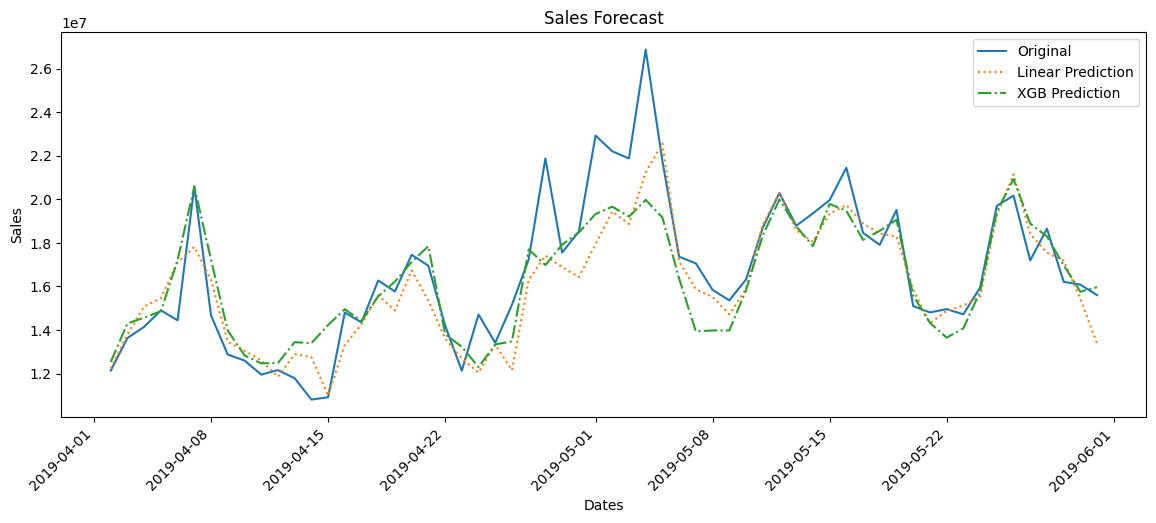


 Model Parameters:
Holiday:
  Linear Regression co-ef:  -1291550.3346
  XGBoost Importance: 0.0351

Discounted Stores:
  Linear Regression co-ef:  3050378.6934
  XGBoost Importance: 0.0748

Day Count:
  Linear Regression co-ef:  -292.8688
  XGBoost Importance: 0.0158

Weekend:
  Linear Regression co-ef:  2829124.5298
  XGBoost Importance: 0.3933

Month_sine:
  Linear Regression co-ef:  69829.2154
  XGBoost Importance: 0.0123

Month_cosine:
  Linear Regression co-ef:  118590.6553
  XGBoost Importance: 0.0286

Day of Week_sine:
  Linear Regression co-ef:  449137.6988
  XGBoost Importance: 0.0412

Day of Week_cosine:
  Linear Regression co-ef:  -396599.8429
  XGBoost Importance: 0.0151

Sales_Lag1:
  Linear Regression co-ef:  1203194.1560
  XGBoost Importance: 0.2859

Sales_Lag2:
  Linear Regression co-ef:  13651.7655
  XGBoost Importance: 0.0148

Sales_Lag3:
  Linear Regression co-ef:  71775.9046
  XGBoost Importance: 0.0121

Sales_Lag7:
  Linear Regression co-ef:  142041.7989
  XGBoost

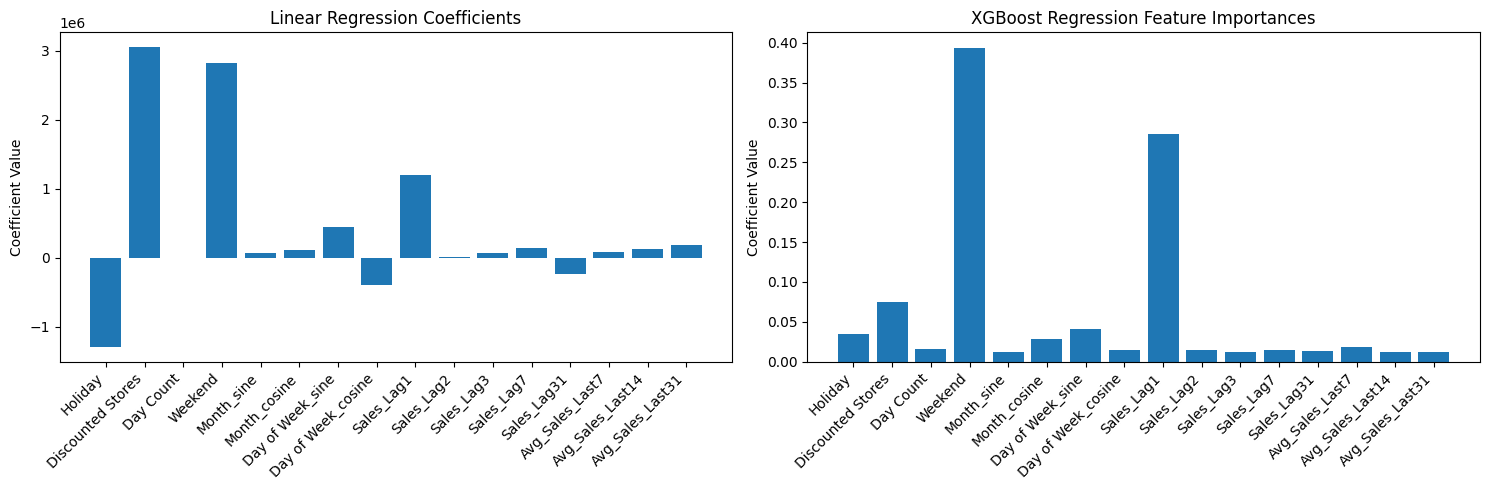

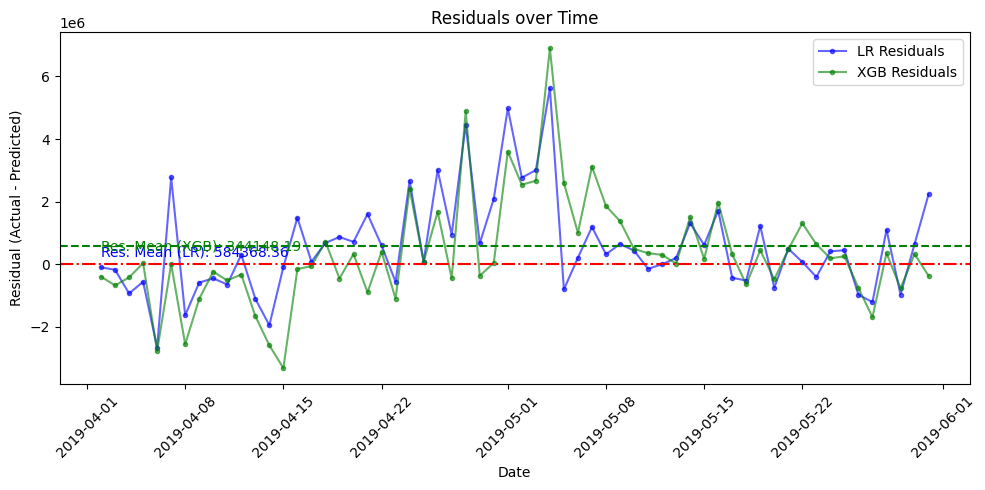

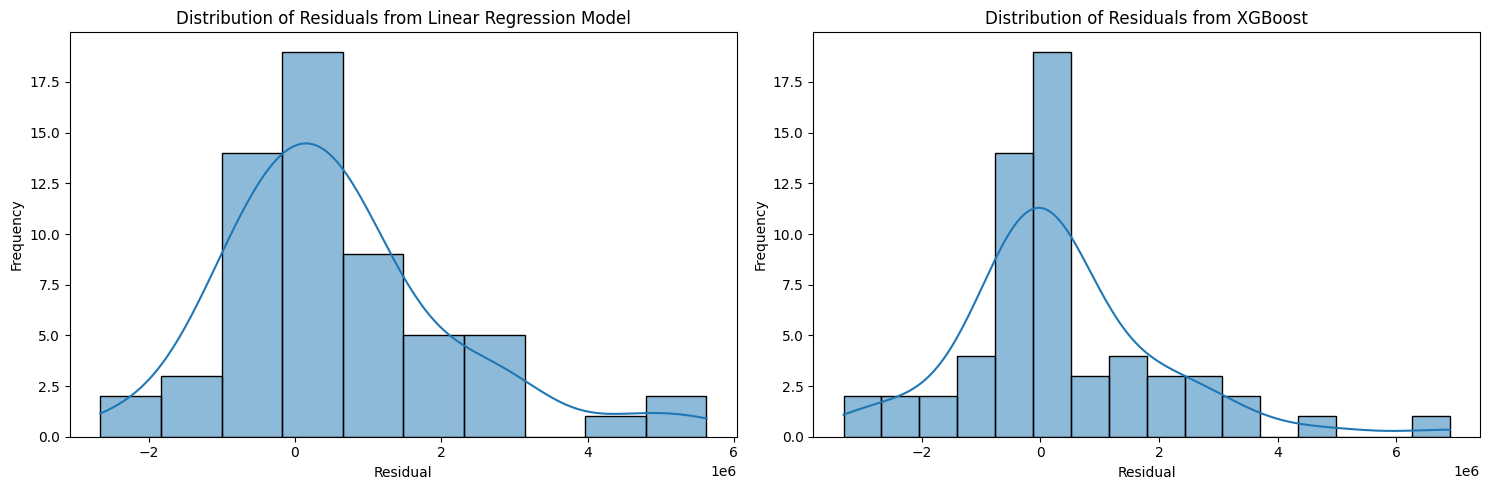

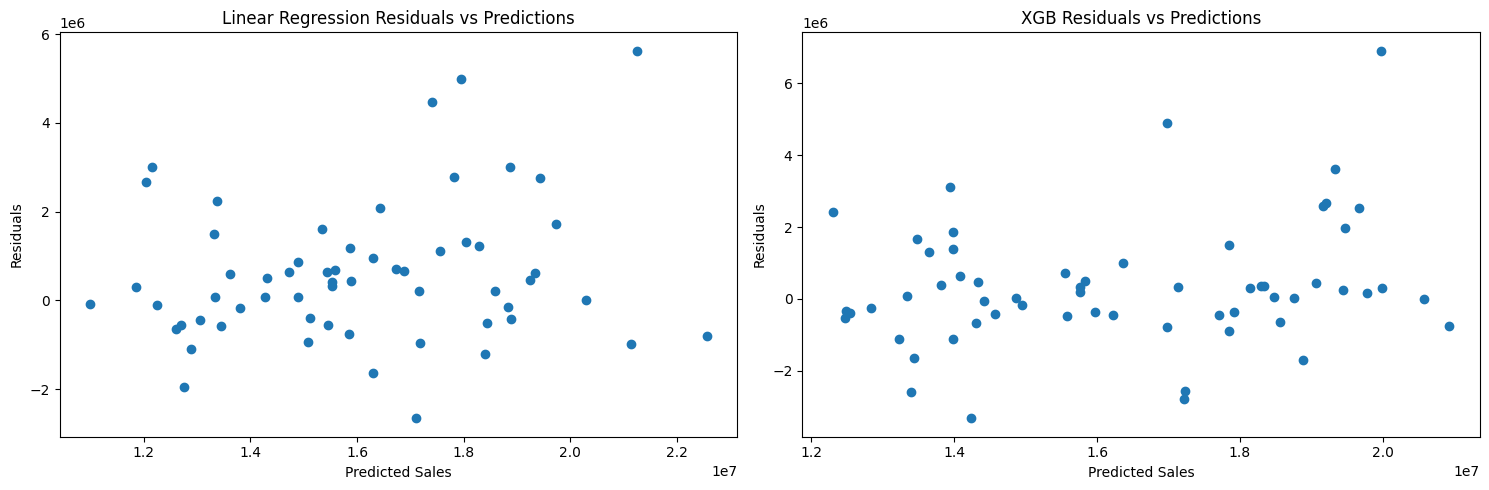

In [151]:
regression_forecast(lr_co, 60)

In [152]:
# A shorter Function to
# Split Data
# Train Linear Regression & XGB Model
# Predict Sales for n days.
# Measure MAE, RMSE, MAPE

def regression_forecast_lite(df, n):

    # Splitting the data into training and test sets
    x_train = df.iloc[:-n, :-1]
    x_test = df.iloc[-n:, :-1]
    y_train = df.iloc[:-n, -1]
    y_test = df.iloc[-n:, -1]

    # Linear Regression Training
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Ridge Regression Training
    #model_r = Ridge(alpha=0.001)
    #model_r.fit(x_train, y_train)

    # XGBoost Regression Training
    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_xgb.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    #y_pred_r = model_r.predict(x_test)
    y_pred_xgb = model_xgb.predict(x_test)

    # Performance Evaluation
    print("Linear Regression:")
    performance(y_test, y_pred)
    print()
    #print("Ridge Regression:")
    #performance(y_test, y_pred_r)
    #print()
    print("XGBoost Regression:")
    performance(y_test, y_pred_xgb)
    print()


In [153]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [154]:
for name, data in lr_data.items():
  print(name)
  regression_forecast_lite(data, 60)
  print()

Company
Linear Regression:
MAE : 1172347.682
RMSE : 1673382.784
MAPE: 0.067

XGBoost Regression:
MAE : 1168665.341
RMSE : 1752816.872
MAPE: 0.07


Region 1
Linear Regression:
MAE : 446130.734
RMSE : 634474.432
MAPE: 0.068

XGBoost Regression:
MAE : 522751.219
RMSE : 705403.953
MAPE: 0.079


Region 2
Linear Regression:
MAE : 274037.077
RMSE : 369449.433
MAPE: 0.061

XGBoost Regression:
MAE : 319793.596
RMSE : 409310.123
MAPE: 0.073


Region 3
Linear Regression:
MAE : 310973.314
RMSE : 447682.771
MAPE: 0.077

XGBoost Regression:
MAE : 326764.739
RMSE : 445791.957
MAPE: 0.085


Region 4
Linear Regression:
MAE : 161370.453
RMSE : 226893.031
MAPE: 0.074

XGBoost Regression:
MAE : 179927.004
RMSE : 240643.125
MAPE: 0.084




### **Linear & XGBoost Regression Report:**

* Linear Regression ourperforms XGB: Linear Regression marginally (0.3 to 1.2%) outperforms XGBoost Regression across all levels (Company and Regions 1-4), showing lower MAE, RMSE, and MAPE in every case.

* MAPE: The Linear Regression models achieved a good MAPE in the range of 6.1% to 7.7% whereas the XGBoost Model achieved a MAPE in the range of 7% to 8.5%

* The Linear Regression model assigns higher weightage (co-efficients) to Proportion of stores with Discounts, Holiday, Weekend and the previous day's Sales (Lag 1)

* The XGBoost model assigns highest importance to Weekends, previous days Sales, Holiday and Proportion of Discounted stores.

* **However, it should be noted that the model uses lag_values as features and the test data contained lag values which would otherwise not be available when forecasting for future dates. This contributed to the model performing better than expected. For future dates, the model prediction can be applied recursively i.e. 1 day at a time such that the predicted values can be used to create lag values for future dates. The performance is expected to decay in such a situation as the predicted values generated will have errors which will add up over time.**

## **Recursive Regression Forecasting**
Using ForecasterRecursive from skforecast.recursive

In [155]:
lr_co.columns

Index(['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine',
       'Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales_Lag1',
       'Sales_Lag2', 'Sales_Lag3', 'Sales_Lag7', 'Sales_Lag31',
       'Avg_Sales_Last7', 'Avg_Sales_Last14', 'Avg_Sales_Last31', 'Sales'],
      dtype='object')

In [156]:
#Preparing datsets
# Dropping lag features which will be generated by ForecasterRecursive()

lr_co_rec = lr_co[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r1_rec = lr_r1[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r2_rec = lr_r2[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r3_rec = lr_r3[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r4_rec = lr_r4[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]


In [ ]:
!pip install skforecast

In [158]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures

In [175]:
def recursive_forecast_test(name, df, target_col='Sales', forecast_horizon=60):

    df = df.copy()
    df = df.dropna().reset_index(drop=True)
    y = df[target_col]
    X = df.drop(columns=[target_col])
    dates = df.index

    # Split train-test
    y_train = y[:-forecast_horizon]
    y_test = y[-forecast_horizon:]
    X_train = X[:-forecast_horizon]
    X_test = X[-forecast_horizon:]
    test_index = y_test.index

    # Lag and rolling features
    window_features = rolling_features = RollingFeatures(
        stats=['mean','mean','mean'],
        window_sizes=[7, 14, 31])

    # Initialize Forecaster
    forecaster_lr = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features
    )

    forecaster_lr_exog = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features
    )

    forecaster_xgb = ForecasterRecursive(
        regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        lags=[1, 2, 3, 7, 31],
        #window_features=window_features
    )


    # Model fit without exogenous variables
    forecaster_lr.fit(y=y_train)

    # Models fit with exogenous variables
    forecaster_lr_exog.fit(y=y_train, exog=X_train)
    forecaster_xgb.fit(y=y_train, exog=X_train)

    # Predict using test set exogenous variables
    y_pred_lr = forecaster_lr.predict(steps=forecast_horizon)
    y_pred_lr_exog = forecaster_lr_exog.predict(steps=forecast_horizon, exog=X_test)
    y_pred_xgb = forecaster_xgb.predict(steps=forecast_horizon, exog=X_test)

    # Evaluation
    print(f"\n{name} Forecast Performance with Linear Regression:")
    performance(y_test, y_pred_lr)

    print(f"\n{name} Forecast Performance with Linear Regression & Exogenous Variables:")
    performance(y_test, y_pred_lr_exog)

    print(f"\n{name} Forecast Performance with XGBoost & Exogenous Variables::")
    performance(y_test, y_pred_xgb)

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(test_index, y_test, label="Actual")
    plt.plot(test_index, y_pred_lr, linestyle="dashed", label="LR Forecast", color="blue")
    plt.plot(test_index, y_pred_lr_exog, linestyle="dotted", label="LR Forecast with Exog", color="red")
    plt.plot(test_index, y_pred_xgb, linestyle="dashed", label="XGBoost Forecast", color="green")
    plt.title(f"{name} - Forecast vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [160]:
lr_data_rec = {'Company': lr_co_rec, 'Region 1': lr_r1_rec, 'Region 2': lr_r2_rec, 'Region 3': lr_r3_rec, 'Region 4':lr_r4_rec}

Company

Company Forecast Performance with Linear Regression:
MAE : 2409000.705
RMSE : 3227432.079
MAPE: 0.138

Company Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 2672553.742
RMSE : 3332336.464
MAPE: 0.151

Company Forecast Performance with XGBoost & Exogenous Variables::
MAE : 1911790.634
RMSE : 2598232.178
MAPE: 0.108


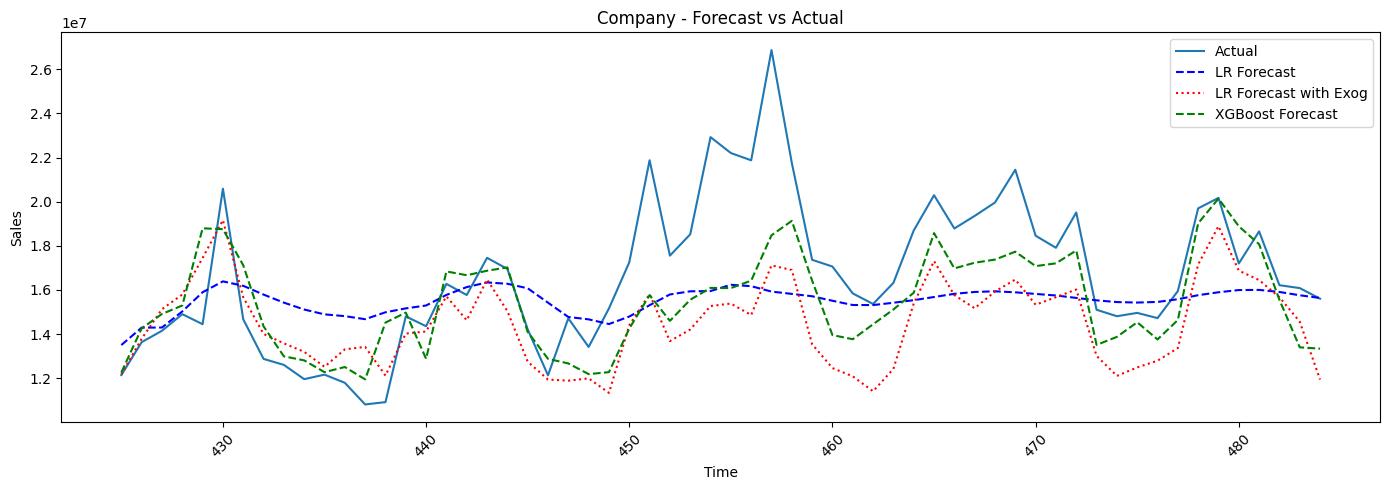

Region 1

Region 1 Forecast Performance with Linear Regression:
MAE : 967057.048
RMSE : 1271464.588
MAPE: 0.144

Region 1 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 1066596.634
RMSE : 1318389.507
MAPE: 0.158

Region 1 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 841206.737
RMSE : 1076831.276
MAPE: 0.122


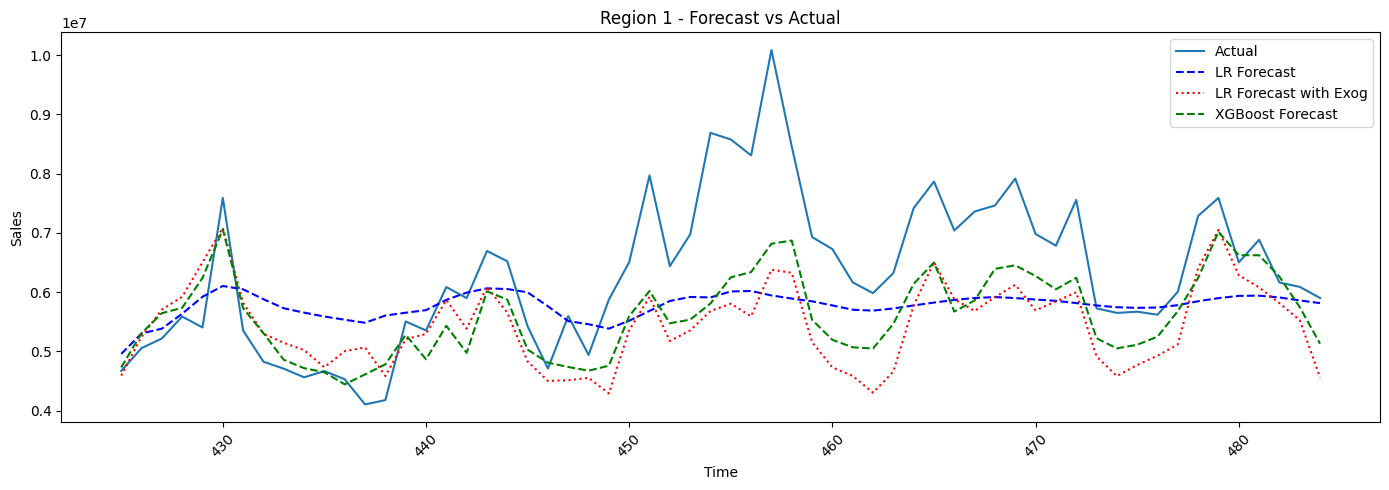

Region 2

Region 2 Forecast Performance with Linear Regression:
MAE : 553250.789
RMSE : 711869.337
MAPE: 0.124

Region 2 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 598941.601
RMSE : 730205.962
MAPE: 0.131

Region 2 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 464415.254
RMSE : 603738.198
MAPE: 0.101


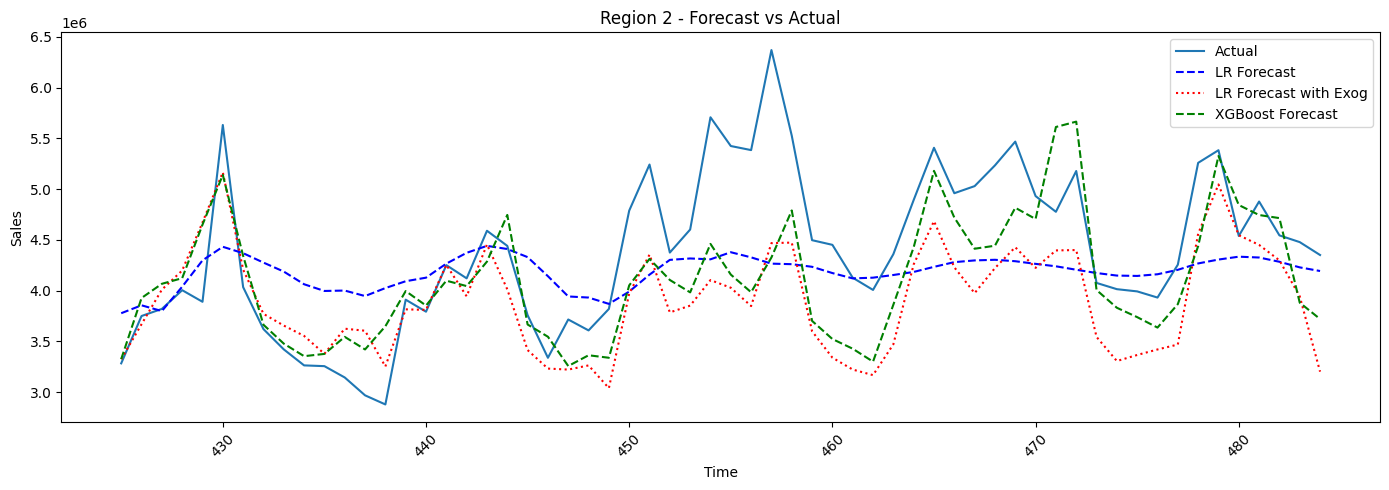

Region 3

Region 3 Forecast Performance with Linear Regression:
MAE : 604830.777
RMSE : 806155.061
MAPE: 0.151

Region 3 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 644942.079
RMSE : 802230.96
MAPE: 0.158

Region 3 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 462565.927
RMSE : 620177.128
MAPE: 0.115


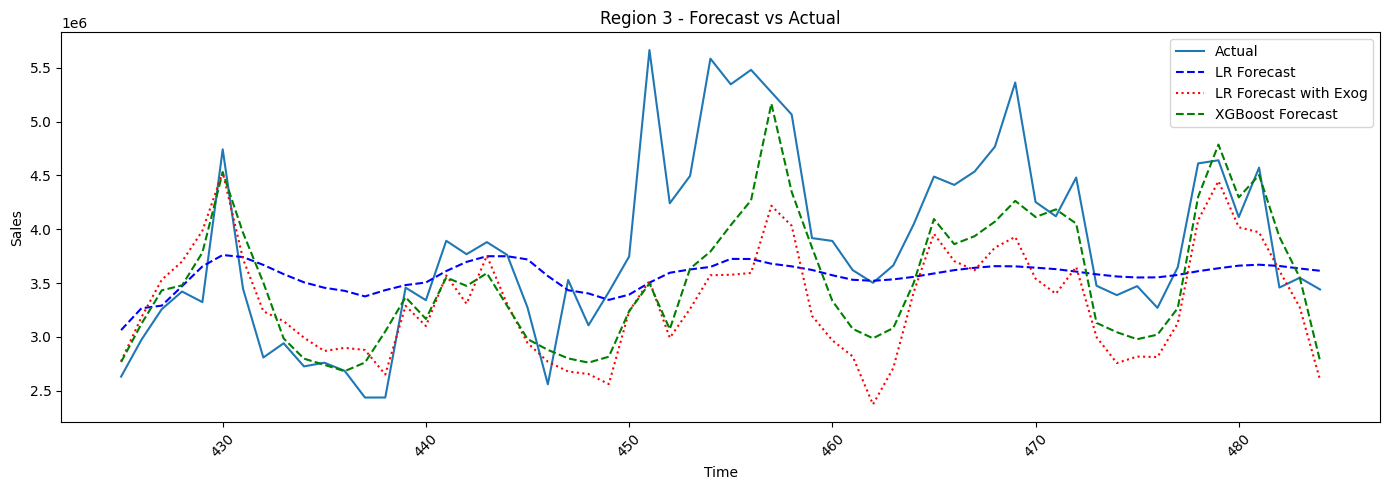

Region 4

Region 4 Forecast Performance with Linear Regression:
MAE : 303121.148
RMSE : 410950.775
MAPE: 0.138

Region 4 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 352951.477
RMSE : 437785.83
MAPE: 0.158

Region 4 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 258010.147
RMSE : 347000.205
MAPE: 0.117


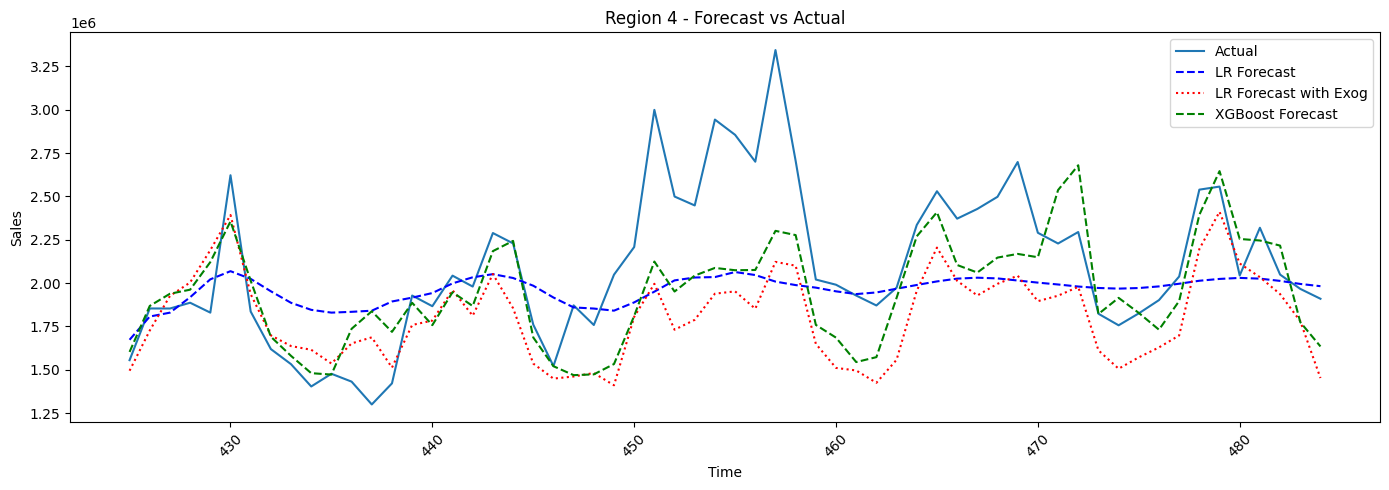

In [178]:
for name, data in lr_data_rec.items():
  print(name)
  recursive_forecast_test(name, data, target_col='Sales', forecast_horizon=60)

### **Recursive Forecasting Test Report**

* Linear Regression and XGBoost models were build and recursive forecasting was performed on test data using skforecast ForecasterRecursive.

* In this test the test data did not contain lag features from the original data but were created recursively i.e. sales was predicted one record (row) at a time and the predicted data was used as lag values for future dates. The predicted and actual sales values were then compared.  

* Interestingly the Linear Regression model performed better without exogenous variables (Date features like Weekend, Holiday, Day of the week, etc) while the XGBoost model performed much better with the exogenous variables and without the rolling 7,14,31 averages.

* Unlike the earlier scenario, here the XGBoost model outperformed the Linear Regression model in all datasets by a considerable margin.

* When applied recursively the Linear Regression model predicted sales for 60 days with a MAPE of between 12.4% (for Region 2) to 15.1% (for Region 3) with exogenous variable. Without exogenous variables, the Linear Regression Model had a higher MAPE between 13.1% to 15.8%.

* When applied recursively the XGBoost model with exogenous variables predicted sales for 60 days with a MAPE of between 10.1% (for Region 1) to 12.2% (for Region 4).

* The MAPE as expected is much higher but can be considered fairly good.  

* The LR model without exogenous variables resulted in a better MAPE than with exog variables. however, on visual inspection the LR predictions without exog variables shows a relatively smooth steadily line whereas the plot line for LR predictions with exog variables appears to follow the patterns of the actual predictions more closely like the XGBoost Model. A possible reason could be the presence of outliers in the Sales data being captured

## **Regression Forecast : Inference Data**

Data given in the file TEST_FINAL.csv was imported as dataframe df_test and will be used to predict sales for the period 2019-06-01 to 2019-07-31


###**Preparing Dataset for Inferencing**

In [79]:
# Inference (test) data provided as Test

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [197]:
# Function to tranform and process the inference data given
  # The test data provided is ungrouped with records of all stores for each day
  # The data needs to be grouped and transformed for the Recursive Forecasting function
  # The function will group and aggregate the data for Company and Regions : R1, R2, R3, R4

def inference_data_processor(data):
    import pandas as pd
    import numpy as np

    # Step 1: Convert 'Date' to datetime and add 'Discounted_Flag'
    data['Date'] = pd.to_datetime(data['Date'])
    data['Discounted_Flag'] = data['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Step 2: Define helper to process each group
    def process_group(group_df):
        group_df = group_df.groupby('Date').agg({
            'Holiday': 'last',
            'Discounted_Flag': lambda x: x.sum() / x.count()
        }).rename(columns={'Discounted_Flag': 'Discounted Stores'})

        # Add date features
        group_df['Day Count'] = (group_df.index - group_df.index.min()).days
        group_df['Weekend'] = group_df.index.dayofweek.isin([5, 6]).astype(int)
        day_of_week = group_df.index.dayofweek
        month = group_df.index.month

        # Cyclical features
        group_df['Month_sine'] = np.sin(2 * np.pi * month / 12)
        group_df['Month_cosine'] = np.cos(2 * np.pi * month / 12)
        group_df['Day of Week_sine'] = np.sin(2 * np.pi * day_of_week / 7)
        group_df['Day of Week_cosine'] = np.cos(2 * np.pi * day_of_week / 7)

        return group_df

    # Step 3: Create datasets
    inf_all = process_group(data)
    inf_r1 = process_group(data[data['Region_Code'] == 'R1'])
    inf_r2 = process_group(data[data['Region_Code'] == 'R2'])
    inf_r3 = process_group(data[data['Region_Code'] == 'R3'])
    inf_r4 = process_group(data[data['Region_Code'] == 'R4'])

    return inf_all, inf_r1, inf_r2, inf_r3, inf_r4



In [198]:
# Creating Inference Dataframes

inf_all, inf_r1, inf_r2, inf_r3, inf_r4 = inference_data_processor(df_test)

In [199]:
inf_sets = {'Company': inf_all, 'Region 1': inf_r1, 'Region 2': inf_r2, 'Region 3': inf_r3, 'Region 4':inf_r4}

In [206]:
# Recursive Prediction Function for Inference Data...
# df_train : Training data
# df_inference: is the inference data for the period to be forecasted
# inf_label : Regional Level of the inference data e.g. Company, Region 1, Region 2, etc


def recursive_forecast(df_train, df_inference, inf_label, target_col='Sales'):

    # Copy input data
    df_train = df_train.copy()
    df_inference = df_inference.copy()

    #set date frequency (error fix)
    df_train.index.freq = 'D'
    df_inference.index.freq = 'D'

    # Extract target and exogenous variables
    y_train = df_train[target_col]
    X_train = df_train.drop(columns=[target_col])
    X_inference = df_inference.drop(columns=[target_col]) if target_col in df_inference.columns else df_inference

    # Forecast horizon
    forecast_horizon = len(df_inference)

    # Lag and rolling
    window_features = rolling_features = RollingFeatures(
        stats=['mean','mean','mean'],
        window_sizes=[7, 14, 31])

    max_lag = 31
    last_window = y_train[-max_lag:]  # or more if rolling windows are large

    # Initialize forecasters
    forecaster_lr = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features)

    forecaster_xgb = ForecasterRecursive(
        regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        lags=[1, 2, 3, 7, 31])

    # Fit models with exogenous variables
    forecaster_lr.fit(y=y_train, exog=X_train)
    forecaster_xgb.fit(y=y_train, exog=X_train)

    # Predict with exogenous variables for inference period
    y_pred_lr = forecaster_lr.predict(steps=forecast_horizon, exog=X_inference, last_window=y_train[-max_lag:])
    y_pred_xgb = forecaster_xgb.predict(steps=forecast_horizon, exog=X_inference, last_window=y_train[-max_lag:])

    # Assign predictions to df_inference
    df_inference_lr = df_inference.copy()
    df_inference_lr['Sales'] = y_pred_lr.values

    df_inference_xgb = df_inference.copy()
    df_inference_xgb['Sales'] = y_pred_xgb.values

    # Plot results
    plt.figure(figsize=(14, 5))
    plt.plot(df_train.index[-100:], y_train[-100:], label="Historical Sales", color='black')
    plt.plot(df_inference_lr.index, df_inference_lr['Sales'], linestyle="dashed", label="Predicted Sales (LR)", color="blue")
    plt.plot(df_inference_xgb.index, df_inference_xgb['Sales'], linestyle="dashed", label="Predicted Sales (XGB)", color="green")
    plt.title(f"Forecasted Sales for {inf_label}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df_inference_lr, df_inference_xgb


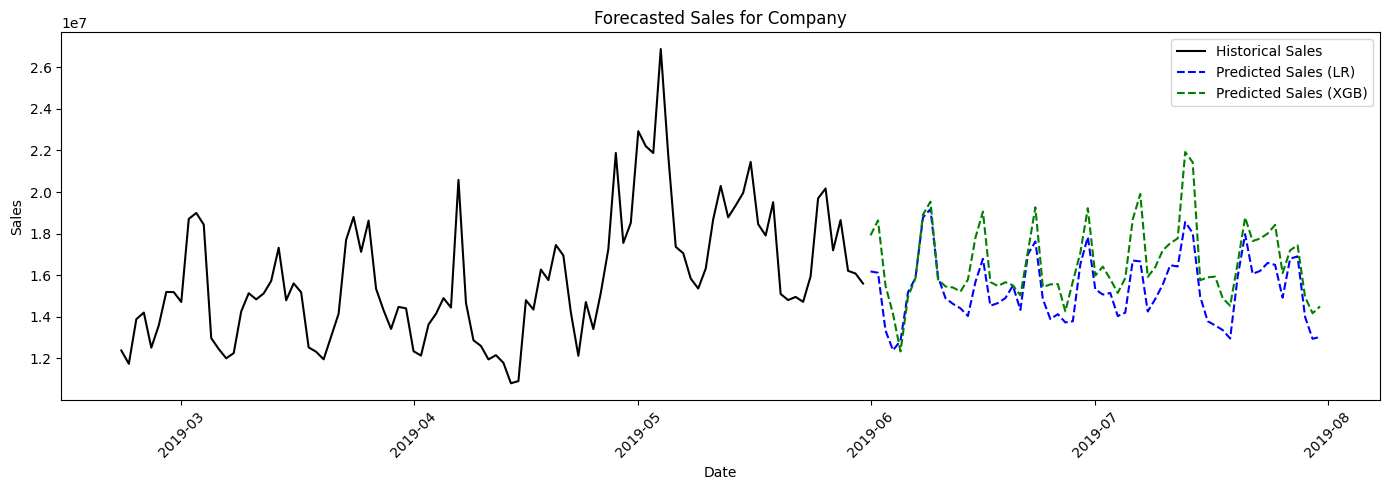

In [209]:
lr_predictions_co, xgb_predictions_co = recursive_forecast(lr_co_rec, inf_all, 'Company','Sales')

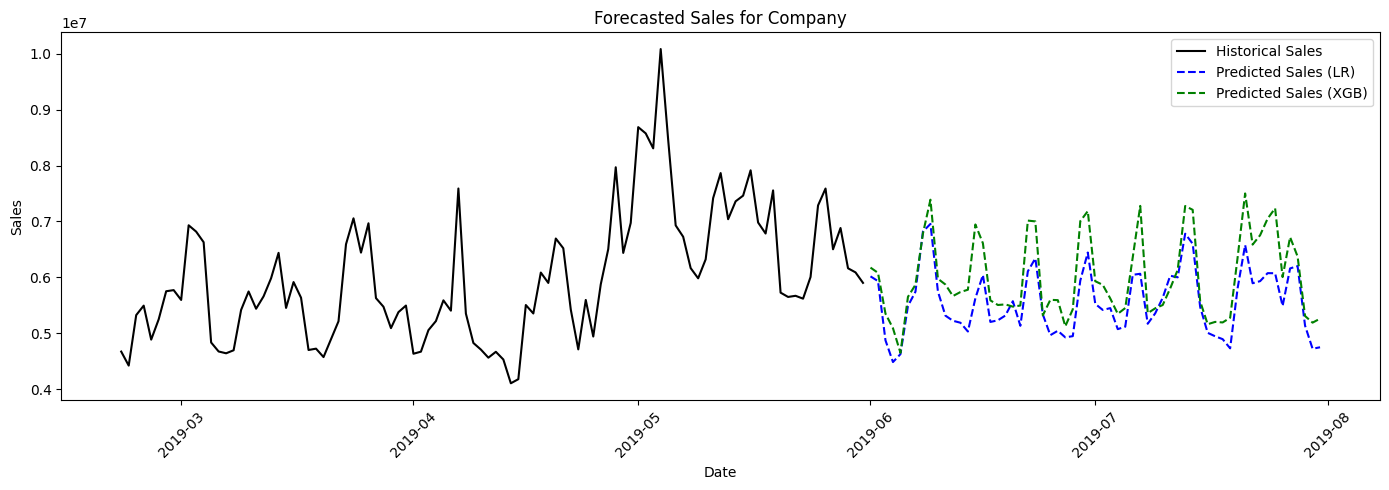

In [210]:
lr_predictions_r1, xgb_predictions_r1 = recursive_forecast(lr_r1_rec, inf_all, 'Company','Sales')

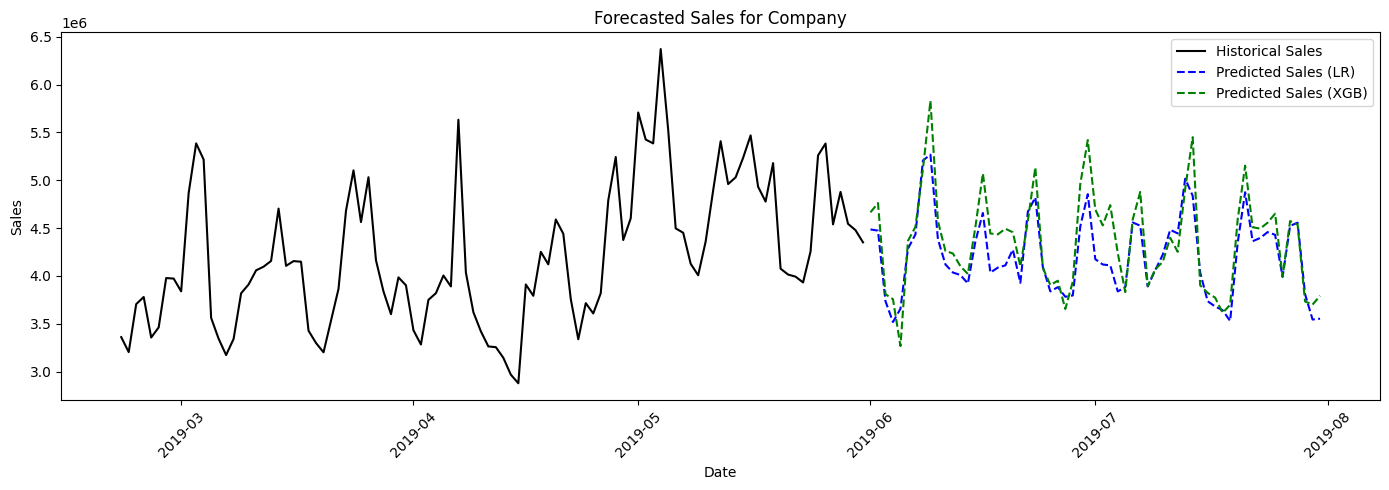

In [211]:
lr_predictions_r2, xgb_predictions_r2 = recursive_forecast(lr_r2_rec, inf_all, 'Company','Sales')

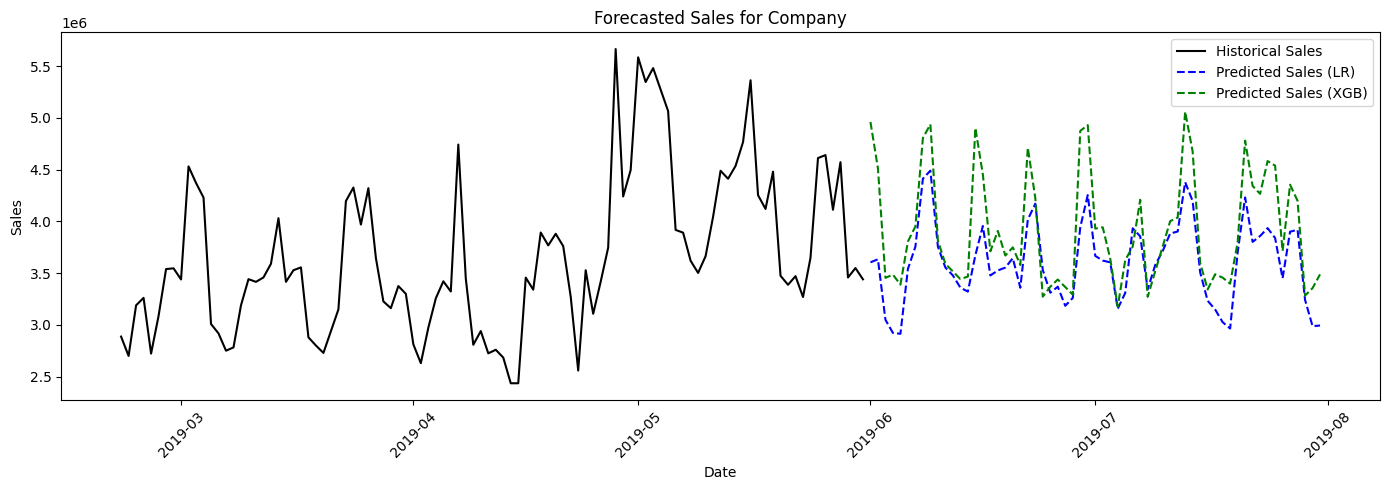

In [213]:
lr_predictions_r3, xgb_predictions_r3 = recursive_forecast(lr_r3_rec, inf_all, 'Company','Sales')

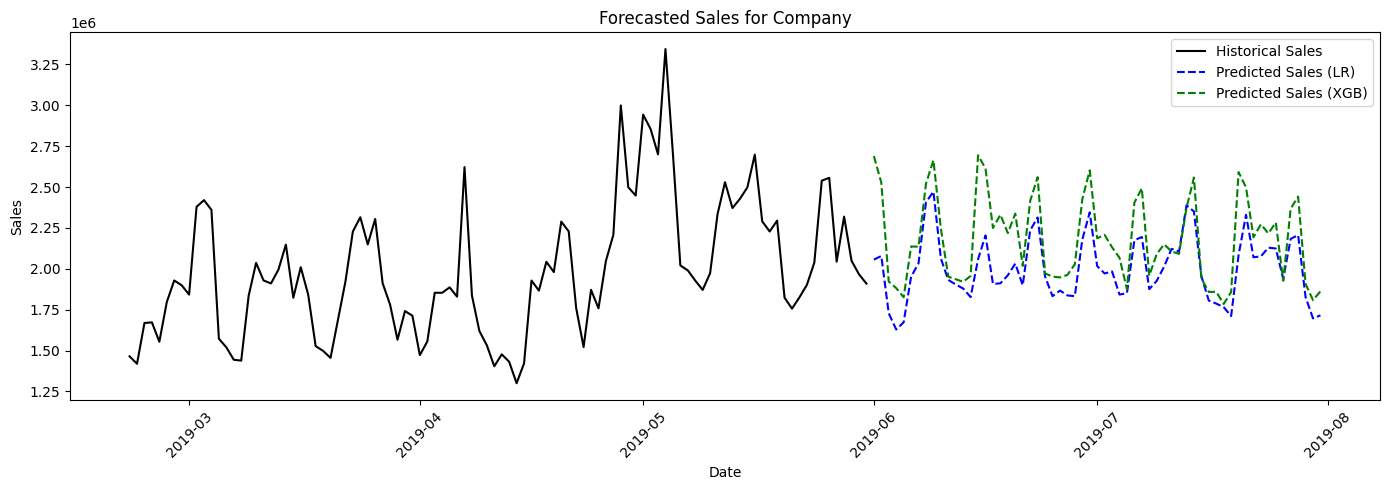

In [214]:
lr_predictions_r4, xgb_predictions_r4 = recursive_forecast(lr_r4_rec, inf_all, 'Company','Sales')

In [215]:
lr_predictions_r4.head()

,Holiday,Discounted Stores,Day Count,Weekend,Month_sine,Month_cosine,Day of Week_sine,Day of Week_cosine,Sales
Date,,,,,,,,,
2019-06-01,0,0.027397,0,1,1.224647e-16,-1.0,-0.974928,-0.222521,2.056092e+06
2019-06-02,0,0.032877,1,1,1.224647e-16,-1.0,-0.781831,0.623490,2.078105e+06
2019-06-03,0,0.117808,2,0,1.224647e-16,-1.0,0.000000,1.000000,1.727111e+06
2019-06-04,0,0.117808,3,0,1.224647e-16,-1.0,0.781831,0.623490,1.628804e+06
2019-06-05,1,0.687671,4,0,1.224647e-16,-1.0,0.974928,-0.222521,1.672345e+06




---



---

